In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the data from the CSV file
df = pd.read_csv('albums_final.csv')

# Try converting release_date to datetime, but handle errors
def parse_date(date):
    try:
        return pd.to_datetime(date)
    except:
        # If conversion fails (e.g., only year given), return first day of the year
        return pd.to_datetime(f'{date}-01-01', errors='coerce')

# Apply the function to the 'release_date' column
df['release_date'] = df['release_date'].apply(parse_date)

# Create a new column combining year and month
df['release_month_year'] = df['release_date'].dt.to_period('M')

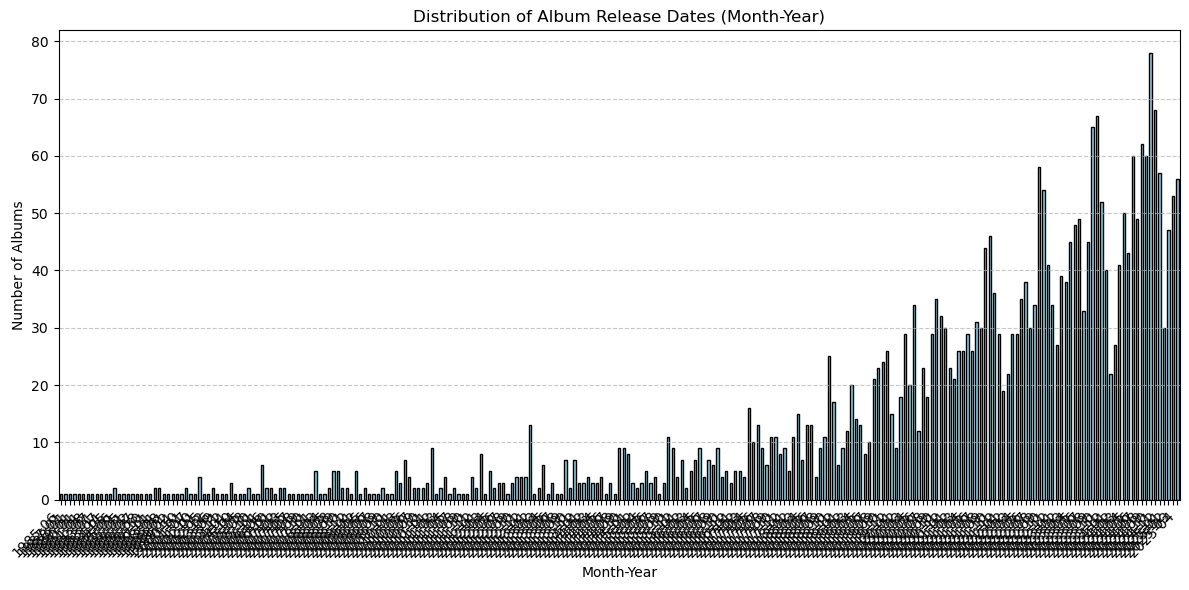

In [5]:
# Plot distribution of album release months and years
plt.figure(figsize=(12, 6))
df['release_month_year'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Album Release Dates (Month-Year)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

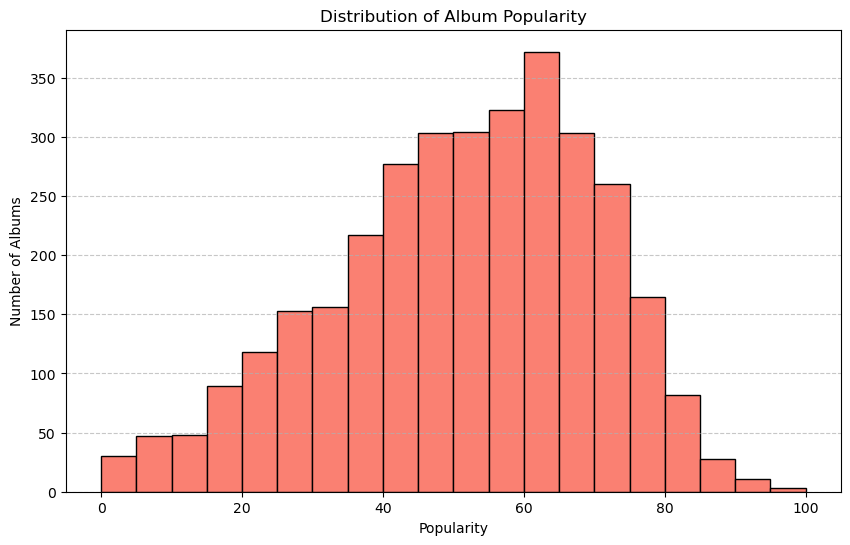

In [6]:
# Plot distribution of album popularity
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, edgecolor='black', color='salmon')
plt.title('Distribution of Album Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Albums')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()